In [1]:
## Although we have the classification scheme of banded and local rainfall, we can further decompose banded rainfall
#into changes due to frequency and to intensity, and then see the net change in rainfall induced by each of those.

#therefore, we create a new variable - f*i, effective rainfall, and we can calculate changes and compare to the banded rainfall
#classification scheme

#can also approximate changes as f*delta i + i*delta f

#significance testing strategy will be to choose random sets of years and combine total combined front frequency and mean intensity
#and thereby effective rainfall

In [1]:
import numpy as np
import time
import os
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
#import masked arrays - important because intensity shows up as a NaN at some points
%matplotlib notebook
import numpy.ma as ma
import scipy.stats as st

In [2]:
## LOAD MEAN FREQUENCY DATA FOR TIME PERIODS OF INTEREST
loadfile = "RDA_hov_periods"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"
loadname = ferretpath + loadfile + ".nc"

#import from netCDF file
freqload = nc.Dataset(loadname, "r")

#list of time periods of interest
yr_beg = [1951,1951,1980,1980,1994]
yr_end = [2007,1979,2007,1993,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
lats = []

for yb, ye in zip(yr_beg, yr_end):

    yb_last2= str(yb-1900)
    print(yb_last2)
    ye_last2= str("{0:0=2d}".format((ye-1900)%100))
    print(ye_last2)
    
    lats.append(freqload['lat_hov_smth_' + yb_last2 + ye_last2][:])
    
freqload.close()

51
07
51
79
80
07
80
93
94
07


In [4]:
## LOAD MEAN INTENSITY DATA FOR TIME PERIODS OF INTEREST
loadfile = "RDA_int_climo"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"
loadname = ferretpath + loadfile + ".nc"

#import from netCDF file
intload = nc.Dataset(loadname, "r")

#list of time periods of interest
yr_beg = [1951,1951,1980,1980,1994]
yr_end = [2007,1979,2007,1993,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
ints = []

for yb, ye in zip(yr_beg, yr_end):

    yb_last2= str(yb-1900)
    print(yb_last2)
    ye_last2= str("{0:0=2d}".format((ye-1900)%100))
    print(ye_last2)
    
    ints.append(intload['int_mean_' + yb_last2 + ye_last2][:])
    
intload.close()

51
07
51
79
80
07
80
93
94
07


In [5]:
rainfall_eff = [f*i for f, i in zip(lats,ints) ] 

In [8]:
## SAVE AS NETCDF
## SAVE FREQUENCY DIFFERENCES AND P-VALUES AS NETCDF
outfilename = "RDA_effective_rainfall.nc"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"

#netCDF output file formatting formatting
fullname = ferretpath + outfilename

##the following is only to make sure that we don't exceed the bounds of the number of rows of actual data.
if os.path.isfile(fullname):
    os.remove(fullname)
    
outfile = nc.Dataset(fullname, 'w')


#create dimensions in NetCDF file
days_dim = outfile.createDimension('time', None)
lat_dim = outfile.createDimension('lat', 22)
dim_tuple = ("time","lat")

#run through loop and save all differences of interest, as well as p-values
for yb, ye, rain in zip(yr_beg, yr_end, rainfall_eff):
    
    #convoluted line of code below guarantees that 2007 will become '07' and not '7'
    yb_last2= str(yb-1900)
    ye_last2= str("{0:0=2d}".format((ye-1900)%100))
    years = yb_last2 + ye_last2
    print(years)

    #create variables inside netCDF file
    rain_out = outfile.createVariable("rain_effective_" + years, 'f8', dim_tuple)
    
    #fill with actual values
    rain_out[:] = rain
    
outfile.close()

5107
5179
8007
8093
9407


In [6]:
print(lats[0][200,:])
print(ints[0][200,:])
print(rainfall_eff[0][200,:])

[ 0.00272904  0.02105263  0.02362573  0.0297076   0.03204678  0.03298246
  0.02175439  0.02152047  0.0194152   0.02315789  0.03321637  0.04046784
  0.04421053  0.04888889  0.04959064  0.04538012  0.03789474  0.03345029
  0.02783626  0.0205848   0.01578947  0.01481481]
[37.90512512286032 33.09937650437558 32.62319777050344 32.27439730156701
 31.4248218687748 30.81390648987485 27.981854063979544 25.891627473446828
 24.665686081931327 26.049530006474722 26.44275616017386 26.39948539585312
 26.229321411604467 25.583714726345526 24.61021146486886 23.485019439717135
 23.071599384347625 22.633778298903174 22.359608015292316
 22.194744497165775 22.830153643391167 22.72927693982279]
[0.10344478591034004 0.6968289790394858 0.7707468946949351
 0.9587949607716983 1.0070644669057653 1.0163183193151704
 0.6087280533216604 0.5571999362706685 0.4788893438129357
 0.6032522738341515 0.878332485320395 1.0683300522766292 1.1596121045130396
 1.2507593866213367 1.220436217673029 1.065752928960263 0.87429218

<IPython.core.display.Javascript object>


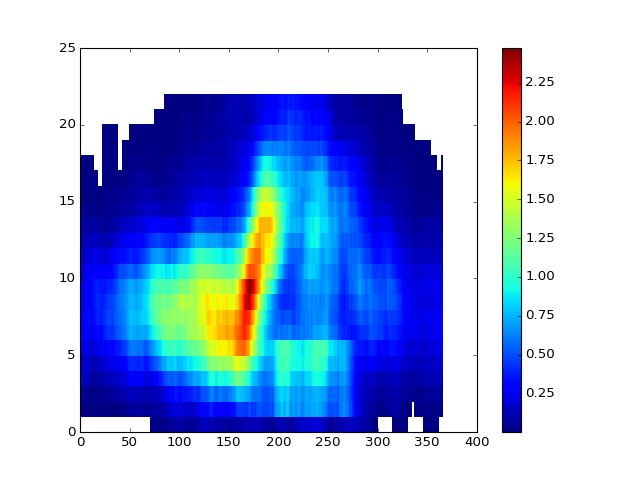

In [7]:
fig = plt.figure()
ax = plt.pcolormesh(rainfall_eff[0].T)
plt.colorbar()


In [8]:
## DECADAL CHANGES IN EFFECTIVE RAINFALL

#time limits for different time period (periods given below)
p1_beg = [1951,1980]
p1_end = [1979,1993]
p2_beg = [1980,1994]
p2_end = [2007,2007]

rainfall_p1 = [rainfall_eff[1], rainfall_eff[3]]
rainfall_p2 = [rainfall_eff[2], rainfall_eff[4]]

In [12]:
rain_diff = []

for rain1, rain2 in zip(rainfall_p1, rainfall_p2):
    rain_diff.append(rain2-rain1)

In [13]:
## SAVE AS NETCDF
## SAVE FREQUENCY DIFFERENCES AND P-VALUES AS NETCDF
outfilename = "RDA_effective_rainfall_diff.nc"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"

#netCDF output file formatting formatting
fullname = ferretpath + outfilename

##the following is only to make sure that we don't exceed the bounds of the number of rows of actual data.
if os.path.isfile(fullname):
    os.remove(fullname)
    
outfile = nc.Dataset(fullname, 'w')

#use same years as chosen above:
#p1_beg = [1951,1980]
#p1_end = [1979,1993]
#p2_beg = [1980,1994]
#p2_end = [2007,2007]

#create dimensions in NetCDF file
days_dim = outfile.createDimension('time', None)
lat_dim = outfile.createDimension('lat', 22)
dim_tuple = ("time","lat")

#run through loop and save all differences of interest, as well as p-values
for p1_b, p1_e, p2_b, p2_e, r_diff in zip(p1_beg, p1_end, p2_beg, p2_end, rain_diff):
    
    #convoluted line of code below guarantees that 2007 will become '07' and not '7'
    yrs_p1 = str(p1_b-1900) + str("{0:0=2d}".format((p1_e-1900)%100))
    yrs_p2 = str(p2_b-1900) + str("{0:0=2d}".format((p2_e-1900)%100))
    years = yrs_p2 + '_' + yrs_p1
    print(years)

    #create variables inside netCDF file
    rain_diff_out = outfile.createVariable("rain_effective_diff_" + years, 'f8', dim_tuple)
    
    #fill with actual values
    rain_diff_out[:] = r_diff
    
outfile.close()

8007_5179
9407_8093


In [ ]:
#nice function lifted from RDA_intensity.ipynb

##collect function designed to aggregate all observations from 3D storage matrix - takes every ensemble (3rd dimension)
#then selections range of days and latitude range (I've mostly been using 15 day and 2 degree-latitude smoothing)

#RETURNS every non-NaN observation, as a single numpy array
#inputs: P is the full 3D matrix, dd is the day of interest(0-364), yy is the latitude bin of interest (likely 0-21)
def collect(P,dd,latbin,dayrange,latrange):
        
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    Psample = P.take(range(dd-ll,dd+ll+1), mode='wrap', axis=0)
    P_collect = Psample[:,max(0,latbin-yy):min(days,latbin+yy+1),:].flatten()
    P_return = P_collect[~np.isnan(P_collect)]
    #print(len(P_collect))
    #print(len(P_return))
    
    return P_collect[~np.isnan(P_collect)]